# Example 5: Analyzing Spike Train Data

This tutorial demonstrates the end-to-end workflow for analyzing relationships between populations of spiking neurons, including a method for improving the stability of the results.

**Goal:**
1.  Introduce the `SpikeProcessor` for handling spike train data.
2.  Use a sweep to find the characteristic timescale of a relationship.
3.  Demonstrate how to perform multiple runs to get a more robust, averaged MI estimate and an error bar.

## 1. Imports

In [17]:
import torch
import numpy as np
import pandas as pd
import neural_mi as nmi
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

## 2. Generating Synthetic Spike Data

We'll simulate two neural populations, X and Y, where Y is driven by X with a ~20ms delay. Our goal is to recover this timescale from the data.

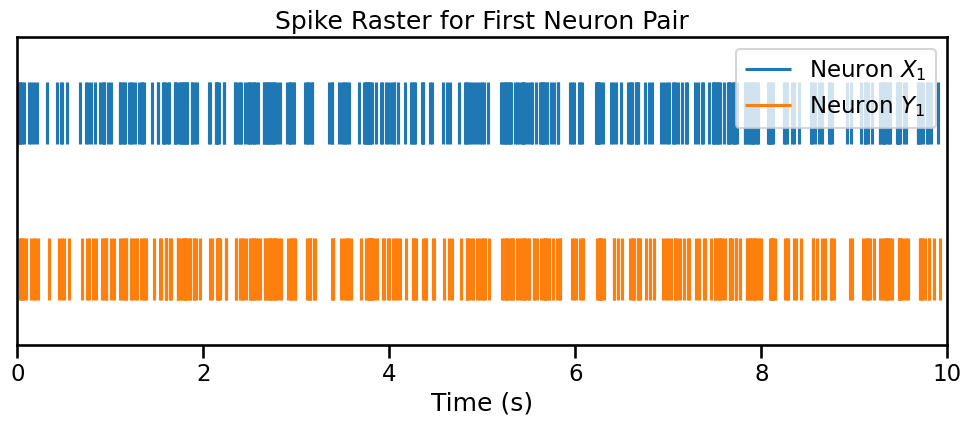

In [18]:
x_spike_data, y_spike_data = nmi.datasets.generate_correlated_spike_trains(firing_rate=30)

# Visualize the first two neurons to see the relationship
plt.figure(figsize=(12, 4))
plt.eventplot(x_spike_data[0], color='C0', linelengths=0.8, lineoffsets=1, label=r'Neuron $X_1$')
plt.eventplot(y_spike_data[0], color='C1', linelengths=0.8, lineoffsets=-1, label=r'Neuron $Y_1$')
plt.yticks([]); 
plt.xlabel("Time (s)"); 
plt.title("Spike Raster for First Neuron Pair"); 
plt.xlim(0, 10); 
plt.legend()
plt.show()

## 3. Improving Robustness with Multiple Runs

Due to the randomness in neural network initialization and training, a single MI estimate can be noisy. To get a more stable result, we should run the estimation multiple times for each `window_size` and average the results.

As you astutely noted, we can achieve this easily using the existing sweep functionality. We'll add a `run_id` parameter to our sweep grid. By providing a list like `[0, 1, 2, 3, 4]`, we tell the sweep engine to perform 5 independent runs for every other parameter combination.

In [19]:
base_params = {
    'n_epochs': 100, 'learning_rate': 1e-3, 'batch_size': 128,
    'patience': 10, 'embedding_dim': 16, 'hidden_dim': 64, 'n_layers': 2
}

sweep_grid = {
    'window_size': [0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15],
    'run_id': range(20) # Perform 20 runs for each window size
}

sweep_results_df = nmi.run(
    x_data=x_spike_data,
    y_data=y_spike_data,
    mode='sweep',
    base_params=base_params,
    sweep_grid=sweep_grid,
    processor_type='spike',
    step_size=0.001,
    n_workers=4
)

display(sweep_results_df.head())

Created 160 parallel processing & training tasks...
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.


Epoch 100/100 | Test MI: 1.5675: 100%|██████████| 100/100 [00:00<00:00, 445.61it/s]
Epoch 100/100 | Test MI: 1.5840: 100%|██████████| 100/100 [00:00<00:00, 448.89it/s]
Epoch 100/100 | Test MI: 1.5881: 100%|██████████| 100/100 [00:00<00:00, 446.26it/s]
Epoch 100/100 | Test MI: 1.6814: 100%|██████████| 100/100 [00:00<00:00, 432.74it/s]
Epoch 49/100 | Test MI: 0.2030:  48%|████▊     | 48/100 [00:00<00:00, 531.28it/s]
Epoch 71/100 | Test MI: 1.2987:  48%|████▊     | 48/100 [00:00<00:00, 477.63it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.1139)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.3614)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.2070)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.0940)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 39 (Final MI: 0.6123)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 1.7019: 100%|██████████| 100/100 [00:00<00:00, 526.24it/s]
Epoch 100/100 | Test MI: 1.9475: 100%|██████████| 100/100 [00:00<00:00, 484.45it/s]
Epoch 100/100 | Test MI: 1.8643: 100%|██████████| 100/100 [00:00<00:00, 470.75it/s]
Epoch 100/100 | Test MI: 1.4700: 100%|██████████| 100/100 [00:00<00:00, 497.07it/s]
Epoch 58/100 | Test MI: 1.0812:  50%|█████     | 50/100 [00:00<00:00, 496.77it/s]

Best epoch identified (via smoothed curve): 93 (Final MI: 3.1429)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.3654)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.2607)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 2.8591)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 1.7413: 100%|██████████| 100/100 [00:00<00:00, 500.34it/s]
Epoch 100/100 | Test MI: 1.6746: 100%|██████████| 100/100 [00:00<00:00, 515.75it/s]
Epoch 100/100 | Test MI: 1.7758: 100%|██████████| 100/100 [00:00<00:00, 490.89it/s]
Epoch 100/100 | Test MI: 1.7235: 100%|██████████| 100/100 [00:00<00:00, 500.98it/s]
Epoch 47/100 | Test MI: 0.9524:   0%|          | 0/100 [00:00<?, ?it/s]23.79it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.3740)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.3367)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.2759)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.0216)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 1.1781: 100%|██████████| 100/100 [00:00<00:00, 539.34it/s]
Epoch 100/100 | Test MI: 1.2046: 100%|██████████| 100/100 [00:00<00:00, 526.04it/s]
Epoch 100/100 | Test MI: 2.1533: 100%|██████████| 100/100 [00:00<00:00, 505.35it/s]
Epoch 100/100 | Test MI: 1.3840: 100%|██████████| 100/100 [00:00<00:00, 515.75it/s]
Epoch 56/100 | Test MI: 0.9791:  51%|█████     | 51/100 [00:00<00:00, 509.38it/s]

Best epoch identified (via smoothed curve): 97 (Final MI: 3.3016)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 2.4699)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.4047)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 2.8908)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 2.0944: 100%|██████████| 100/100 [00:00<00:00, 478.94it/s]
Epoch 100/100 | Test MI: 1.6571: 100%|██████████| 100/100 [00:00<00:00, 499.05it/s]
Epoch 100/100 | Test MI: 2.0553: 100%|██████████| 100/100 [00:00<00:00, 476.66it/s]
Epoch 20/100 | Test MI: 0.1199:   0%|          | 0/100 [00:00<?, ?it/s]74.74it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.3129)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.0346)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.5488)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.3278)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 1.7714: 100%|██████████| 100/100 [00:00<00:00, 498.42it/s]
Epoch 100/100 | Test MI: 1.7526: 100%|██████████| 100/100 [00:00<00:00, 487.32it/s]
Epoch 100/100 | Test MI: 1.8582: 100%|██████████| 100/100 [00:00<00:00, 505.67it/s]
Epoch 100/100 | Test MI: 1.9685: 100%|██████████| 100/100 [00:00<00:00, 505.61it/s]
Epoch 77/100 | Test MI: 1.4705:  48%|████▊     | 48/100 [00:00<00:00, 473.54it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.6350)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.3462)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.4909)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.4791)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 1.9515: 100%|██████████| 100/100 [00:00<00:00, 491.40it/s]
Epoch 100/100 | Test MI: 1.4228: 100%|██████████| 100/100 [00:00<00:00, 522.77it/s]
Epoch 100/100 | Test MI: 1.8713: 100%|██████████| 100/100 [00:00<00:00, 511.22it/s]
Epoch 100/100 | Test MI: 1.6040: 100%|██████████| 100/100 [00:00<00:00, 514.01it/s]
Epoch 69/100 | Test MI: 1.3982:  53%|█████▎    | 53/100 [00:00<00:00, 526.68it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.1280)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.5344)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.0650)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.1524)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 1.9592: 100%|██████████| 100/100 [00:00<00:00, 504.21it/s]
Epoch 100/100 | Test MI: 1.8895: 100%|██████████| 100/100 [00:00<00:00, 508.09it/s]
Epoch 100/100 | Test MI: 1.6001: 100%|██████████| 100/100 [00:00<00:00, 493.34it/s]
Epoch 100/100 | Test MI: 1.7355: 100%|██████████| 100/100 [00:00<00:00, 506.73it/s]
Epoch 3/100 | Test MI: 0.0045:   0%|          | 0/100 [00:00<?, ?it/s]488.82it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.1936)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.5425)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.1488)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.1220)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.


Epoch 100/100 | Test MI: 1.4389: 100%|██████████| 100/100 [00:00<00:00, 489.48it/s]
Epoch 100/100 | Test MI: 1.8466: 100%|██████████| 100/100 [00:00<00:00, 502.65it/s]
Epoch 100/100 | Test MI: 1.6387: 100%|██████████| 100/100 [00:00<00:00, 467.08it/s]
Epoch 100/100 | Test MI: 1.4530: 100%|██████████| 100/100 [00:00<00:00, 480.12it/s]
Epoch 100/100 | Test MI: 1.9890: 100%|██████████| 100/100 [00:00<00:00, 521.25it/s]
Epoch 100/100 | Test MI: 1.6448: 100%|██████████| 100/100 [00:00<00:00, 516.80it/s]
Epoch 35/100 | Test MI: 0.4915:   0%|          | 0/100 [00:00<?, ?it/s]97.75it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.1215)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 5.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.1665)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.5071)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 6.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.1859)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 1.3872: 100%|██████████| 100/100 [00:00<00:00, 495.48it/s]
Epoch 100/100 | Test MI: 1.9260: 100%|██████████| 100/100 [00:00<00:00, 499.83it/s]
Epoch 100/100 | Test MI: 1.5204: 100%|██████████| 100/100 [00:00<00:00, 508.21it/s]
Epoch 88/100 | Test MI: 1.6257:  52%|█████▏    | 52/100 [00:00<00:00, 514.18it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 2.9131)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.2903)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.1174)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.2051)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 1.7129: 100%|██████████| 100/100 [00:00<00:00, 495.88it/s]
Epoch 92/100 | Test MI: 1.1525:  91%|█████████ | 91/100 [00:00<00:00, 486.60it/s]
Epoch 100/100 | Test MI: 2.1374: 100%|██████████| 100/100 [00:00<00:00, 476.66it/s]
Epoch 100/100 | Test MI: 2.0078: 100%|██████████| 100/100 [00:00<00:00, 480.00it/s]
Epoch 76/100 | Test MI: 1.3007:  52%|█████▏    | 52/100 [00:00<00:00, 516.61it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.7852)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 81 (Final MI: 3.0517)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.9191)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.8447)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 1.7092: 100%|██████████| 100/100 [00:00<00:00, 489.07it/s]
Epoch 100/100 | Test MI: 1.8398: 100%|██████████| 100/100 [00:00<00:00, 475.59it/s]
Epoch 100/100 | Test MI: 2.0786: 100%|██████████| 100/100 [00:00<00:00, 447.74it/s]
Epoch 100/100 | Test MI: 2.0593: 100%|██████████| 100/100 [00:00<00:00, 470.88it/s]
Epoch 62/100 | Test MI: 1.2789:  49%|████▉     | 49/100 [00:00<00:00, 486.11it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.4268)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 94 (Final MI: 3.8476)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.8387)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.5524)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 2.0005: 100%|██████████| 100/100 [00:00<00:00, 471.97it/s]
Epoch 100/100 | Test MI: 1.8028: 100%|██████████| 100/100 [00:00<00:00, 447.08it/s]
Epoch 100/100 | Test MI: 1.9187: 100%|██████████| 100/100 [00:00<00:00, 445.13it/s]
Epoch 17/100 | Test MI: 0.0638:   0%|          | 0/100 [00:00<?, ?it/s]38.24it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.7351)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.9234)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.9837)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 90 (Final MI: 3.5587)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 1.9521: 100%|██████████| 100/100 [00:00<00:00, 486.79it/s]
Epoch 100/100 | Test MI: 2.0337: 100%|██████████| 100/100 [00:00<00:00, 517.52it/s]
Epoch 100/100 | Test MI: 1.9484: 100%|██████████| 100/100 [00:00<00:00, 509.40it/s]
Epoch 100/100 | Test MI: 2.1232: 100%|██████████| 100/100 [00:00<00:00, 494.04it/s]
Epoch 41/100 | Test MI: 0.5353:   0%|          | 0/100 [00:00<?, ?it/s]15.98it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 4.0358)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.9202)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.0155)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.8397)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 2.0094: 100%|██████████| 100/100 [00:00<00:00, 503.30it/s]
Epoch 100/100 | Test MI: 2.0241: 100%|██████████| 100/100 [00:00<00:00, 503.88it/s]
Epoch 100/100 | Test MI: 1.3623: 100%|██████████| 100/100 [00:00<00:00, 520.35it/s]
Epoch 100/100 | Test MI: 1.7712: 100%|██████████| 100/100 [00:00<00:00, 474.01it/s]
Epoch 30/100 | Test MI: 0.2371:   0%|          | 0/100 [00:00<?, ?it/s]86.09it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.6007)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.0079)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.6267)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.1696)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 1.5723: 100%|██████████| 100/100 [00:00<00:00, 502.77it/s]
Epoch 100/100 | Test MI: 2.0646: 100%|██████████| 100/100 [00:00<00:00, 510.89it/s]
Epoch 100/100 | Test MI: 1.5809: 100%|██████████| 100/100 [00:00<00:00, 509.13it/s]
Epoch 93/100 | Test MI: 1.8818:  51%|█████     | 51/100 [00:00<00:00, 506.36it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.8414)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 94 (Final MI: 3.9704)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.1265)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.6040)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 1.9255: 100%|██████████| 100/100 [00:00<00:00, 503.75it/s]
Epoch 100/100 | Test MI: 2.0717: 100%|██████████| 100/100 [00:00<00:00, 502.26it/s]
Epoch 100/100 | Test MI: 1.9972: 100%|██████████| 100/100 [00:00<00:00, 517.49it/s]
Epoch 12/100 | Test MI: 0.0229:   0%|          | 0/100 [00:00<?, ?it/s]06.69it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.7249)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.8652)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.9581)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.4886)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 2.1866: 100%|██████████| 100/100 [00:00<00:00, 493.26it/s]
Epoch 100/100 | Test MI: 1.5872: 100%|██████████| 100/100 [00:00<00:00, 498.94it/s]
Epoch 100/100 | Test MI: 1.6701: 100%|██████████| 100/100 [00:00<00:00, 516.86it/s]
Epoch 100/100 | Test MI: 1.7302: 100%|██████████| 100/100 [00:00<00:00, 523.12it/s]
Epoch 80/100 | Test MI: 1.6662:  50%|█████     | 50/100 [00:00<00:00, 492.95it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.3243)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.8469)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 97 (Final MI: 3.8232)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.8437)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.


Epoch 100/100 | Test MI: 1.8480: 100%|██████████| 100/100 [00:00<00:00, 502.01it/s]
Epoch 100/100 | Test MI: 2.0410: 100%|██████████| 100/100 [00:00<00:00, 504.32it/s]
Epoch 100/100 | Test MI: 1.9291: 100%|██████████| 100/100 [00:00<00:00, 492.80it/s]
Epoch 100/100 | Test MI: 2.2394: 100%|██████████| 100/100 [00:00<00:00, 505.34it/s]
Epoch 100/100 | Test MI: 2.2670: 100%|██████████| 100/100 [00:00<00:00, 430.30it/s]
Epoch 100/100 | Test MI: 2.1948: 100%|██████████| 100/100 [00:00<00:00, 429.96it/s]
Epoch 100/100 | Test MI: 1.9374: 100%|██████████| 100/100 [00:00<00:00, 423.75it/s]
Epoch 85/100 | Test MI: 1.2906:  42%|████▏     | 42/100 [00:00<00:00, 417.59it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 4.0412)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 7.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.9174)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.7655)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 8.


Epoch 100/100 | Test MI: 1.3589: 100%|██████████| 100/100 [00:00<00:00, 489.66it/s]
Epoch 100/100 | Test MI: 1.9009: 100%|██████████| 100/100 [00:00<00:00, 504.28it/s]
Epoch 100/100 | Test MI: 2.1970: 100%|██████████| 100/100 [00:00<00:00, 501.75it/s]
Epoch 26/100 | Test MI: 0.4658:   0%|          | 0/100 [00:00<?, ?it/s]09.03it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.8215)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 98 (Final MI: 3.6488)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.7266)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.8536)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.


Epoch 100/100 | Test MI: 1.8989: 100%|██████████| 100/100 [00:00<00:00, 482.73it/s]
Epoch 100/100 | Test MI: 1.8286: 100%|██████████| 100/100 [00:00<00:00, 496.20it/s]
Epoch 80/100 | Test MI: 1.7906:  79%|███████▉  | 79/100 [00:00<00:00, 463.01it/s]
Epoch 92/100 | Test MI: 1.6351:  91%|█████████ | 91/100 [00:00<00:00, 464.01it/s]
Epoch 9/100 | Test MI: 0.0218:   0%|          | 0/100 [00:00<?, ?it/s]461.84it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.9117)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 92 (Final MI: 4.1190)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 70 (Final MI: 3.1705)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 81 (Final MI: 3.7846)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.


Epoch 100/100 | Test MI: 2.2214: 100%|██████████| 100/100 [00:00<00:00, 422.54it/s]
Epoch 100/100 | Test MI: 1.7084: 100%|██████████| 100/100 [00:00<00:00, 435.17it/s]
Epoch 100/100 | Test MI: 1.7774:  99%|█████████▉| 99/100 [00:00<00:00, 446.08it/s]
Epoch 40/100 | Test MI: 0.6469:   0%|          | 0/100 [00:00<?, ?it/s]20.41it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.9500)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.0643)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 88 (Final MI: 4.0787)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 97 (Final MI: 4.0197)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.


Epoch 100/100 | Test MI: 1.9973: 100%|██████████| 100/100 [00:00<00:00, 418.88it/s]
Epoch 100/100 | Test MI: 1.7643: 100%|██████████| 100/100 [00:00<00:00, 495.87it/s]
Epoch 100/100 | Test MI: 1.8761: 100%|██████████| 100/100 [00:00<00:00, 489.28it/s]
Epoch 100/100 | Test MI: 2.2024: 100%|██████████| 100/100 [00:00<00:00, 473.55it/s]
Epoch 29/100 | Test MI: 0.4473:   0%|          | 0/100 [00:00<?, ?it/s]67.33it/s]

Best epoch identified (via smoothed curve): 90 (Final MI: 3.7357)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.1713)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.2027)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 91 (Final MI: 3.9694)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 55 (Final MI: 1.8130)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.


Epoch 100/100 | Test MI: 1.9832: 100%|██████████| 100/100 [00:00<00:00, 497.81it/s]
Epoch 66/100 | Test MI: 1.0136:  65%|██████▌   | 65/100 [00:00<00:00, 507.90it/s]
Epoch 100/100 | Test MI: 1.6410: 100%|██████████| 100/100 [00:00<00:00, 501.16it/s]
Epoch 64/100 | Test MI: 1.6882:  46%|████▌     | 46/100 [00:00<00:00, 451.98it/s]

Best epoch identified (via smoothed curve): 92 (Final MI: 3.5859)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.2154)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 72 (Final MI: 3.4304)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 41 (Final MI: 1.1067)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.0975)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.


Epoch 100/100 | Test MI: 2.2067: 100%|██████████| 100/100 [00:00<00:00, 484.35it/s]
Epoch 82/100 | Test MI: 1.7171:  81%|████████  | 81/100 [00:00<00:00, 479.44it/s]
Epoch 51/100 | Test MI: 0.8362:  50%|█████     | 50/100 [00:00<00:00, 522.92it/s]
Epoch 100/100 | Test MI: 2.0903: 100%|██████████| 100/100 [00:00<00:00, 505.95it/s]
Epoch 64/100 | Test MI: 1.0970:  63%|██████▎   | 63/100 [00:00<00:00, 509.64it/s]
Epoch 95/100 | Test MI: 1.7961:  94%|█████████▍| 94/100 [00:00<00:00, 500.47it/s]
Epoch 100/100 | Test MI: 1.8941: 100%|██████████| 100/100 [00:00<00:00, 493.40it/s]
Epoch 100/100 | Test MI: 2.2398: 100%|██████████| 100/100 [00:00<00:00, 514.41it/s]
Epoch 34/100 | Test MI: 0.5964:   0%|          | 0/100 [00:00<?, ?it/s]64.77it/s]


Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 64 (Final MI: 1.8690)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 85 (Final MI: 4.0327)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3319)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.7872)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.


Epoch 100/100 | Test MI: 1.8105: 100%|██████████| 100/100 [00:00<00:00, 516.24it/s]
Epoch 100/100 | Test MI: 2.2864: 100%|██████████| 100/100 [00:00<00:00, 475.27it/s]
Epoch 100/100 | Test MI: 2.1043: 100%|██████████| 100/100 [00:00<00:00, 496.52it/s]
Epoch 100/100 | Test MI: 1.7723: 100%|██████████| 100/100 [00:00<00:00, 516.98it/s]
Epoch 47/100 | Test MI: 1.3857:   0%|          | 0/100 [00:00<?, ?it/s]22.02it/s]

Best epoch identified (via smoothed curve): 96 (Final MI: 3.8762)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.2995)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 91 (Final MI: 4.1517)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.1251)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.


Epoch 100/100 | Test MI: 1.5099: 100%|██████████| 100/100 [00:00<00:00, 518.80it/s]
Epoch 90/100 | Test MI: 1.5610:  89%|████████▉ | 89/100 [00:00<00:00, 510.13it/s]
Epoch 100/100 | Test MI: 2.2021: 100%|██████████| 100/100 [00:00<00:00, 485.72it/s]
Epoch 94/100 | Test MI: 1.7234:  93%|█████████▎| 93/100 [00:00<00:00, 514.09it/s]
Epoch 32/100 | Test MI: 0.9855:   0%|          | 0/100 [00:00<?, ?it/s]46.43it/s]

Best epoch identified (via smoothed curve): 93 (Final MI: 3.6136)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 79 (Final MI: 3.2701)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3059)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 83 (Final MI: 3.5447)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.


Epoch 100/100 | Test MI: 1.7297: 100%|██████████| 100/100 [00:00<00:00, 481.79it/s]
Epoch 100/100 | Test MI: 1.8236: 100%|██████████| 100/100 [00:00<00:00, 465.43it/s]
Epoch 100/100 | Test MI: 2.1928: 100%|██████████| 100/100 [00:00<00:00, 476.22it/s]
Epoch 100/100 | Test MI: 1.8616: 100%|██████████| 100/100 [00:00<00:00, 510.25it/s]
Epoch 59/100 | Test MI: 0.9471:  58%|█████▊    | 58/100 [00:00<00:00, 522.81it/s]
Epoch 19/100 | Test MI: 0.1943:   0%|          | 0/100 [00:00<?, ?it/s]

Best epoch identified (via smoothed curve): 98 (Final MI: 3.7525)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.
Best epoch identified (via smoothed curve): 94 (Final MI: 4.2530)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3501)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.1072)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 9.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 49 (Final MI: 1.6704)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.


Epoch 100/100 | Test MI: 1.9050: 100%|██████████| 100/100 [00:00<00:00, 489.87it/s]
Epoch 99/100 | Test MI: 2.1083:  98%|█████████▊| 98/100 [00:00<00:00, 481.22it/s]
Epoch 100/100 | Test MI: 2.0292: 100%|██████████| 100/100 [00:00<00:00, 492.97it/s]
Epoch 7/100 | Test MI: 0.0317:   0%|          | 0/100 [00:00<?, ?it/s]]48.13it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 3.8265)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 89 (Final MI: 4.0607)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 12.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.1461)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.1632)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.


Epoch 100/100 | Test MI: 2.0879: 100%|██████████| 100/100 [00:00<00:00, 461.18it/s]
Epoch 100/100 | Test MI: 1.9217: 100%|██████████| 100/100 [00:00<00:00, 474.56it/s]
Epoch 84/100 | Test MI: 1.7341:  83%|████████▎ | 83/100 [00:00<00:00, 489.42it/s]
Epoch 92/100 | Test MI: 1.8452:  91%|█████████ | 91/100 [00:00<00:00, 487.27it/s]
Epoch 6/100 | Test MI: 0.0319:   0%|          | 0/100 [00:00<?, ?it/s]]70.65it/s]

Best epoch identified (via smoothed curve): 92 (Final MI: 4.0010)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 73 (Final MI: 3.7916)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 81 (Final MI: 3.7447)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.2199)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.


Epoch 100/100 | Test MI: 2.2565: 100%|██████████| 100/100 [00:00<00:00, 476.89it/s]
Epoch 87/100 | Test MI: 1.4250:  86%|████████▌ | 86/100 [00:00<00:00, 495.81it/s]
Epoch 100/100 | Test MI: 2.1422: 100%|██████████| 100/100 [00:00<00:00, 499.71it/s]
Epoch 9/100 | Test MI: 0.0429:   0%|          | 0/100 [00:00<?, ?it/s]481.94it/s]


Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 79 (Final MI: 3.7288)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 98 (Final MI: 4.3596)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3448)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 65 (Final MI: 3.0951)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.


Epoch 100/100 | Test MI: 2.2109: 100%|██████████| 100/100 [00:00<00:00, 473.49it/s]
Epoch 75/100 | Test MI: 1.8243:  74%|███████▍  | 74/100 [00:00<00:00, 493.05it/s]
Epoch 100/100 | Test MI: 2.1354: 100%|██████████| 100/100 [00:00<00:00, 504.83it/s]
Epoch 67/100 | Test MI: 1.8370:  66%|██████▌   | 66/100 [00:00<00:00, 489.85it/s]
Epoch 100/100 | Test MI: 2.2149: 100%|██████████| 100/100 [00:00<00:00, 474.08it/s]
Epoch 100/100 | Test MI: 2.2436: 100%|██████████| 100/100 [00:00<00:00, 486.15it/s]
Epoch 77/100 | Test MI: 1.5411:  76%|███████▌  | 76/100 [00:00<00:00, 450.27it/s]
Epoch 77/100 | Test MI: 2.1576:  46%|████▌     | 46/100 [00:00<00:00, 451.94it/s]

Best epoch identified (via smoothed curve): 97 (Final MI: 4.0202)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 57 (Final MI: 3.1331)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.2377)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.1181)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.


Epoch 100/100 | Test MI: 2.1403: 100%|██████████| 100/100 [00:00<00:00, 492.11it/s]
Epoch 100/100 | Test MI: 2.1882: 100%|██████████| 100/100 [00:00<00:00, 476.20it/s]
Epoch 100/100 | Test MI: 2.1716: 100%|██████████| 100/100 [00:00<00:00, 451.65it/s]
Epoch 82/100 | Test MI: 2.0794:  48%|████▊     | 48/100 [00:00<00:00, 475.32it/s]


Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 67 (Final MI: 3.6006)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 99 (Final MI: 4.3442)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 90 (Final MI: 4.1882)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3120)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.


Epoch 100/100 | Test MI: 1.8670: 100%|██████████| 100/100 [00:00<00:00, 488.59it/s]
Epoch 100/100 | Test MI: 2.1262: 100%|██████████| 100/100 [00:00<00:00, 488.25it/s]
Epoch 100/100 | Test MI: 2.1306: 100%|██████████| 100/100 [00:00<00:00, 485.95it/s]
Epoch 100/100 | Test MI: 1.9005: 100%|██████████| 100/100 [00:00<00:00, 504.22it/s]
Epoch 69/100 | Test MI: 1.7719:  47%|████▋     | 47/100 [00:00<00:00, 467.97it/s]

Best epoch identified (via smoothed curve): 95 (Final MI: 4.1236)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.0180)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3594)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 93 (Final MI: 4.2940)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.


Epoch 86/100 | Test MI: 1.7549:  85%|████████▌ | 85/100 [00:00<00:00, 478.71it/s]
Epoch 100/100 | Test MI: 2.2631: 100%|██████████| 100/100 [00:00<00:00, 476.37it/s]
Epoch 83/100 | Test MI: 1.9835:  82%|████████▏ | 82/100 [00:00<00:00, 471.21it/s]
Epoch 100/100 | Test MI: 1.5013:  99%|█████████▉| 99/100 [00:00<00:00, 496.28it/s]
Epoch 52/100 | Test MI: 1.1418:  47%|████▋     | 47/100 [00:00<00:00, 463.03it/s]


Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 75 (Final MI: 3.5680)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 100 (Final MI: 3.9955)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 73 (Final MI: 3.9495)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 89 (Final MI: 3.9433)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.


Epoch 100/100 | Test MI: 2.1997: 100%|██████████| 100/100 [00:00<00:00, 476.80it/s]
Epoch 100/100 | Test MI: 1.8669: 100%|██████████| 100/100 [00:00<00:00, 484.48it/s]
Epoch 100/100 | Test MI: 1.6862: 100%|██████████| 100/100 [00:00<00:00, 486.73it/s]
Epoch 100/100 | Test MI: 1.9907: 100%|██████████| 100/100 [00:00<00:00, 484.35it/s]
Epoch 12/100 | Test MI: 0.1029:   0%|          | 0/100 [00:00<?, ?it/s]07.82it/s]

Best epoch identified (via smoothed curve): 100 (Final MI: 4.2221)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 87 (Final MI: 3.9483)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 97 (Final MI: 4.3119)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 95 (Final MI: 4.1646)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.


Epoch 97/100 | Test MI: 2.0254:  96%|█████████▌| 96/100 [00:00<00:00, 515.56it/s]
Epoch 64/100 | Test MI: 1.4157:  63%|██████▎   | 63/100 [00:00<00:00, 473.60it/s]
Epoch 100/100 | Test MI: 2.1942: 100%|██████████| 100/100 [00:00<00:00, 483.54it/s]
Epoch 100/100 | Test MI: 2.0311: 100%|██████████| 100/100 [00:00<00:00, 482.89it/s]
Epoch 22/100 | Test MI: 0.3567:   0%|          | 0/100 [00:00<?, ?it/s]62.95it/s]


Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 87 (Final MI: 4.1062)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 52 (Final MI: 2.2000)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3057)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.2892)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.


Epoch 76/100 | Test MI: 1.6189:  75%|███████▌  | 75/100 [00:00<00:00, 437.10it/s]
Epoch 100/100 | Test MI: 2.0703: 100%|██████████| 100/100 [00:00<00:00, 470.33it/s]
Epoch 92/100 | Test MI: 1.8824:  91%|█████████ | 91/100 [00:00<00:00, 455.66it/s]
Epoch 100/100 | Test MI: 2.2002: 100%|██████████| 100/100 [00:00<00:00, 442.35it/s]
Epoch 15/100 | Test MI: 0.1976:   0%|          | 0/100 [00:00<?, ?it/s]


Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 76 (Final MI: 3.1555)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 99 (Final MI: 4.2607)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 14.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 92 (Final MI: 3.7906)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 60 (Final MI: 3.4861)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.


Epoch 72/100 | Test MI: 1.6781:  71%|███████   | 71/100 [00:00<00:00, 518.22it/s]
Epoch 97/100 | Test MI: 1.8524:  96%|█████████▌| 96/100 [00:00<00:00, 531.31it/s]
Epoch 96/100 | Test MI: 1.8999:  95%|█████████▌| 95/100 [00:00<00:00, 517.06it/s]
Epoch 65/100 | Test MI: 1.6456:  55%|█████▌    | 55/100 [00:00<00:00, 540.60it/s]


Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 86 (Final MI: 4.2474)
`max_spikes_per_window` not provided. Calculating from data...
Set `max_spikes_per_window` to 16.
Best epoch identified (via smoothed curve): 100 (Final MI: 4.3178)

Early stopping triggered after 10 epochs with no improvement.
Best epoch identified (via smoothed curve): 66 (Final MI: 3.6766)
Best epoch identified (via smoothed curve): 92 (Final MI: 4.2201)


Epoch 100/100 | Test MI: 1.7612: 100%|██████████| 100/100 [00:00<00:00, 564.22it/s]
Epoch 76/100 | Test MI: 1.8743:  75%|███████▌  | 75/100 [00:00<00:00, 619.63it/s]


,window_size,run_id,train_mi,test_mi,best_epoch,test_mi_history
0,0.005,0,4.463753,2.425790,99,"[0.0010807514190673828, 0.0019233226776123047,..."
1,0.005,1,4.855288,2.809703,99,"[0.00015401840209960938, 0.0013501644134521484..."
2,0.005,2,4.813863,2.415912,99,"[0.0035080909729003906, 0.005301237106323242, ..."
3,0.005,3,3.563355,1.762858,99,"[0.0005800724029541016, 0.0015354156494140625,..."
4,0.005,4,4.378023,2.390684,99,"[-5.793571472167969e-05, 0.0010402202606201172..."


## 4. Analyzing the Averaged Results

Our output DataFrame now contains multiple `test_mi` values for each `window_size`. We can use `pandas` to group by `window_size` and calculate the mean and standard deviation, giving us a much more reliable picture.

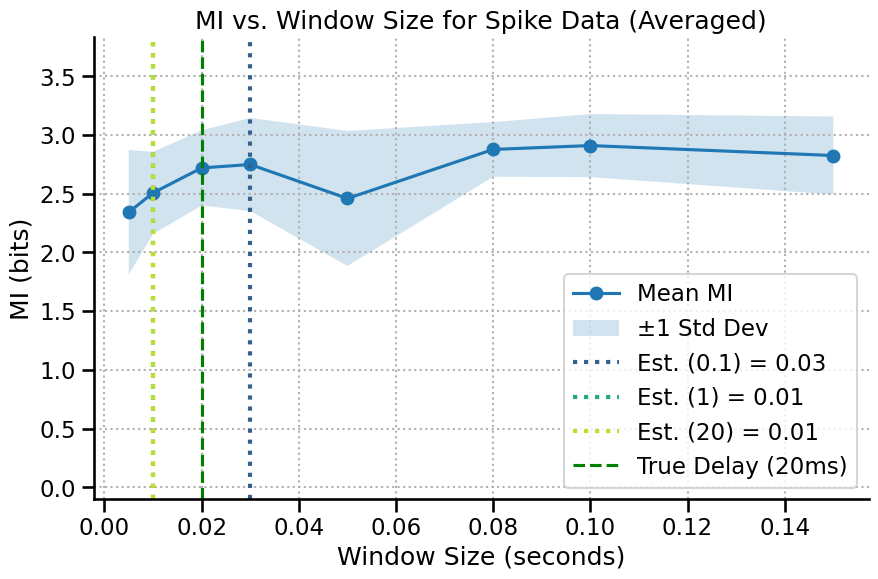

In [21]:
# Group by window_size and aggregate the results
summary_df = sweep_results_df.groupby('window_size')['test_mi'].agg(['mean', 'std']).reset_index()

# Find the window size that gives the highest mean MI using the generic function
best_window = nmi.utils.find_saturation_point(
    summary_df,
    param_col='window_size',
    mean_col='mean',
    std_col='std',
    strictness=[0.1,1,20] 
)

# Create the plot object
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Use the new generic plotting function
nmi.visualize.plot_sweep_curve(
    summary_df=summary_df,
    param_col='window_size',
    mean_col='mean',
    std_col='std',
    estimated_values=best_window,
    ax=ax
)

# Add the tutorial-specific annotations
ax.axvline(x=0.02, color='green', linestyle='--', label='True Delay (20ms)')
# ax.axvline(x=best_window, color='red', linestyle=':', label=f'Optimal Window ({best_window*1000:.0f}ms)')

# Customize labels for this specific plot
ax.set_xlabel("Window Size (seconds)")
ax.set_title("MI vs. Window Size for Spike Data (Averaged)")
ax.legend()
plt.ylim(-0.1, 1.1*(summary_df['mean'].max()+summary_df['std'].max()))

plt.show()

This completes the set of tutorials. You are now equipped with a comprehensive toolkit to analyze complex neural data, from initial exploration to rigorous, high-quality analysis.